# Project: Sentiment Classification (Movie Reviews)

## Curate dataset

In [61]:
g = open('reviews.txt','r') # What we know!
reviews = list(map(lambda x:x[:-1],g.readlines()))
g.close()

g = open('labels.txt','r') # What we WANT to know!
labels = list(map(lambda x:x[:-1].upper(),g.readlines()))
g.close()

In [62]:
reviews[0]

'bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers  . the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students . when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled . . . . . . . . . at . . . . . . . . . . high . a classic line inspector i  m here to sack one of your teachers . student welcome to bromwell high . i expect that many adults of my age think that bromwell high is far fetched . what a pity that it isn  t   '

In [63]:
labels[0]

'POSITIVE'

## Pre-process data and find co-relation between data and labels

In [64]:
from collections import Counter
import numpy as np

In [65]:
positive_counts = Counter()
negative_counts = Counter()
total_counts = Counter()

In [66]:
# list all the words in the POSITIVE and NEGATIVE review

for i in range(len(reviews)):
    if(labels[i] == 'POSITIVE'):
        for word in reviews[i].split(" "):
            positive_counts[word] += 1
            total_counts[word] += 1
    else:
        for word in reviews[i].split(" "):
            negative_counts[word] += 1
            total_counts[word] += 1

In [67]:
# Find co-relation between positive and negative words with their respective lables

pos_neg_ratios = Counter()

for term,cnt in list(total_counts.most_common()):
    if(cnt > 50):
        pos_neg_ratio = positive_counts[term] / float(negative_counts[term]+1)
        pos_neg_ratios[term] = pos_neg_ratio

for word,ratio in pos_neg_ratios.most_common():
    if(ratio > 1):
        pos_neg_ratios[word] = np.log(ratio)
    else:
        pos_neg_ratios[word] = -np.log((1 / (ratio+0.01)))

In [68]:
# words most frequently seen in a review with a "POSITIVE" label
pos_neg_ratios.most_common()

[('edie', 4.6913478822291435),
 ('antwone', 4.4773368144782069),
 ('din', 4.4067192472642533),
 ('gunga', 4.1896547420264252),
 ('goldsworthy', 4.1743872698956368),
 ('gypo', 4.0943445622221004),
 ('yokai', 4.0943445622221004),
 ('paulie', 4.0775374439057197),
 ('visconti', 3.9318256327243257),
 ('flavia', 3.9318256327243257),
 ('gundam', 3.4231762883809305),
 ('iturbi', 3.2771447329921766),
 ('felix', 3.1527360223636558),
 ('capote', 3.0122615755052013),
 ('fido', 3.0081547935525483),
 ('excellently', 2.9789251552376097),
 ('vance', 2.9444389791664403),
 ('kolchak', 2.9311937524164198),
 ('deanna', 2.9267394020670396),
 ('hayworth', 2.9267394020670396),
 ('sammo', 2.8526314299133175),
 ('biko', 2.8332133440562162),
 ('sox', 2.8332133440562162),
 ('laputa', 2.8332133440562162),
 ('polanski', 2.8233610476132043),
 ('alvin', 2.8183982582710754),
 ('matthau', 2.8067217286092401),
 ('mathieu', 2.7725887222397811),
 ('gilliam', 2.7245795030534206),
 ('victoria', 2.6810215287142909),
 ('chav

In [69]:
# words most frequently seen in a review with a "NEGATIVE" label
list(reversed(pos_neg_ratios.most_common()))

[('boll', -4.0778152602708904),
 ('uwe', -3.9218753018711578),
 ('thunderbirds', -3.6447082358007989),
 ('beowulf', -3.6346396851769396),
 ('dahmer', -3.5572016301387364),
 ('wayans', -3.5197159818974928),
 ('seagal', -3.3202501058581921),
 ('gamera', -3.0853444322436783),
 ('dreck', -3.0370818333726866),
 ('unwatchable', -3.0269848170580955),
 ('stinker', -2.9876839403711624),
 ('mst', -2.7753833211707968),
 ('incoherent', -2.7641396677532537),
 ('flimsy', -2.7555911458712101),
 ('dillinger', -2.6762095952465517),
 ('yawn', -2.66353354771016),
 ('unfunny', -2.5545257844967644),
 ('ugh', -2.4922059522696118),
 ('turd', -2.4922059522696118),
 ('waste', -2.4907515123361046),
 ('blah', -2.4475792789485005),
 ('slugs', -2.4427317247372873),
 ('tripe', -2.3838842974917549),
 ('wtf', -2.3715779644809971),
 ('horrid', -2.3715779644809971),
 ('pointless', -2.3451073877136341),
 ('atrocious', -2.3187369339642556),
 ('damme', -2.3051524884992913),
 ('redeeming', -2.2667790015910296),
 ('prom', -

## Creating the Input/Output Data (Transforming Text into Numbers)

In [70]:
# Total number of words in the reviews

vocab = set(total_counts.keys())
vocab_size = len(vocab)

# Vectorize each input data to the below format
'''
layer_0:
 -----------------------------------------------
|  0  |  1  |  3  |    | n - 3  | n - 2  | n - 1|
 -----------------------------------------------
|word1|word2|word3|....|word n-2|word n-1|word n|
 -----------------------------------------------
'''

layer_0 = np.zeros((1,vocab_size))

# Save the index of each word in a dictonary

word2index = {}
for i,word in enumerate(vocab):
    word2index[word] = i
word2index

{'': 0,
 'uranus': 1,
 'misanthrope': 2,
 'sciamma': 3,
 'excrements': 4,
 'westcourt': 5,
 'dyer': 6,
 'reactionary': 7,
 'itz': 8,
 'mab': 9,
 'anywhozitz': 10,
 'rosselini': 11,
 'sagramore': 12,
 'millenial': 13,
 'movieeven': 14,
 'underfoot': 15,
 'windshields': 16,
 'coulisses': 17,
 'stevens': 18,
 'mentoring': 19,
 'parody': 20,
 'suffocatingly': 21,
 'oberon': 22,
 'plana': 23,
 'twined': 24,
 'ayatollahs': 25,
 'mcfadden': 26,
 'amrohi': 27,
 'nads': 28,
 'barcoded': 29,
 'inquest': 30,
 'wanted': 31,
 'negotiatior': 32,
 'wickes': 33,
 'shigeru': 34,
 'stoolie': 35,
 'tidende': 36,
 'childen': 37,
 'calico': 38,
 'overdose': 39,
 'suavely': 40,
 'gimmicks': 41,
 'clank': 42,
 'arold': 43,
 'neighbors': 44,
 'unravelled': 45,
 'bianlian': 46,
 'reconsidered': 47,
 'asif': 48,
 'brownie': 49,
 'telling': 50,
 'characterized': 51,
 'kewl': 52,
 'verhooven': 53,
 'analyses': 54,
 'heroe': 55,
 'kinear': 56,
 'cripplingly': 57,
 'settling': 58,
 'madelein': 59,
 'teleporter': 60

In [71]:
# Function to vectorize each review (set 1 at all words in the review to 1, 0 otherwise)

def update_input_layer(review):
    
    global layer_0
    
    # clear out previous state, reset the layer to be all 0s
    layer_0 *= 0
    for word in review.split(" "):
        layer_0[0][word2index[word]] = 1

# Function to convert label to 1 or 0

def get_target_for_label(label):
    if(label == 'POSITIVE'):
        return 1
    else:
        return 0

In [72]:
update_input_layer(reviews[0])
layer_0

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.]])

In [73]:
get_target_for_label(labels[0])

1

## Reduce noise in the data

In [74]:
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [75]:
# Most of the words, for example: 'a', 'an', 'the', etc., repeat in both positive and negative reviews
# We need to only consider the words that have higher co-relation to their labels
# Following is the co-relation graph of each word with respect to its label
# A large number of words near the mean of the below distribution are ambiguous, we don't really need to consider them

hist, edges = np.histogram(list(map(lambda x: x[1], pos_neg_ratios.most_common())), density=True, bins=100, normed=True)

p = figure(tools="pan, wheel_zoom, reset, save",
           toolbar_location="above",
           title="Word Positive/Negative Affinity Distribution")
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="#555555")
show(p)

In [76]:
# Let's look at one more distribution to really assure that

word_frequency = Counter()

for word, cnt in total_counts.most_common():
    word_frequency[cnt] += 1

hist, edges = np.histogram(list(map(lambda x: x[1], word_frequency.most_common())), density=True, bins=100, normed=True)

p = figure(tools="pan, wheel_zoom, reset, save",
           toolbar_location="above",
           title="The frequency distribution of the words in our corpus")
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="#555555")
show(p)

# As you can see from the below plot, there are few term that dominate the corpus. 
# To get better results, we have to eliminate the words that are most frequent and less frequent.
# Let's do that next

In [77]:
# consider only words that are important as discussed before

review_vocab = set()
min_count = 20
polarity_cutoff = 0.5

for review in reviews:
    for word in review.split(" "):
        if(total_counts[word] > min_count):
            if(word in pos_neg_ratios.keys()):
                if((pos_neg_ratios[word] >= polarity_cutoff) or (pos_neg_ratios[word] <= -polarity_cutoff)):
                    review_vocab.add(word)
            else:
                review_vocab.add(word)
review_vocab = list(review_vocab)
review_vocab

['approval',
 'targeted',
 'influence',
 'idiocy',
 'dyer',
 'televised',
 'gillian',
 'othello',
 'sarcasm',
 'smallest',
 'jameson',
 'astounding',
 'diner',
 'oberon',
 'jannings',
 'torso',
 'rubber',
 'fading',
 'abysmal',
 'literate',
 'kolchak',
 'utah',
 'mommy',
 'management',
 'gimmicks',
 'foreground',
 'gameplay',
 'neighbors',
 'havoc',
 'franchise',
 'professionals',
 'characterized',
 'edwards',
 'settling',
 'facade',
 'conflicted',
 'teddy',
 'ingrid',
 'infectious',
 'cher',
 'preaching',
 'farewell',
 'dealt',
 'throwing',
 'slug',
 'devious',
 'howard',
 'apparently',
 'sexes',
 'custody',
 'screaming',
 'surrender',
 'fatale',
 'seducing',
 'plausibility',
 'pasted',
 'delight',
 'convoluted',
 'natasha',
 'historian',
 'triple',
 'connelly',
 'excuse',
 'billing',
 'sideways',
 'horns',
 'charming',
 'comedienne',
 'cowboy',
 'rourke',
 'december',
 'imagines',
 'beth',
 'transcends',
 'girlfight',
 'forest',
 'woke',
 'equation',
 'menu',
 'exudes',
 'curtis',
 '

In [78]:
# Each review is vectorized to a vector of length = length of revized vocabulary
# Find the index of each word in the vector

word2index = {}
for i, word in enumerate(review_vocab):
    word2index[word] = i
word2index

{'approval': 0,
 'targeted': 1,
 'influence': 2,
 'idiocy': 3,
 'dyer': 4,
 'televised': 5,
 'gillian': 6,
 'othello': 7,
 'sarcasm': 8,
 'smallest': 9,
 'jameson': 10,
 'astounding': 11,
 'diner': 12,
 'oberon': 13,
 'jannings': 14,
 'torso': 15,
 'rubber': 16,
 'fading': 17,
 'abysmal': 18,
 'literate': 19,
 'kolchak': 20,
 'utah': 21,
 'mommy': 22,
 'management': 23,
 'gimmicks': 24,
 'foreground': 25,
 'gameplay': 26,
 'neighbors': 27,
 'havoc': 28,
 'franchise': 29,
 'professionals': 30,
 'characterized': 31,
 'edwards': 32,
 'settling': 33,
 'facade': 34,
 'conflicted': 35,
 'teddy': 36,
 'ingrid': 37,
 'infectious': 38,
 'cher': 39,
 'preaching': 40,
 'farewell': 41,
 'dealt': 42,
 'throwing': 43,
 'slug': 44,
 'devious': 45,
 'howard': 46,
 'apparently': 47,
 'sexes': 48,
 'custody': 49,
 'screaming': 50,
 'surrender': 51,
 'fatale': 52,
 'seducing': 53,
 'plausibility': 54,
 'pasted': 55,
 'delight': 56,
 'convoluted': 57,
 'natasha': 58,
 'historian': 59,
 'triple': 60,
 'con

## Building a Neural Network (Incorporating previously discussed concepts)

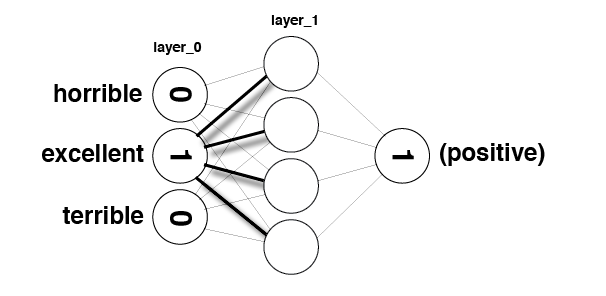

In [79]:
from IPython.display import Image
Image(filename='sentiment_network_sparse.png')

In [80]:
import time
import sys
import numpy as np

class SentimentNetwork:
    def __init__(self, reviews,labels,min_count = 10,polarity_cutoff = 0.1,hidden_nodes = 10, learning_rate = 0.1):
       
        np.random.seed(1)
    
        self.pre_process_data(reviews, polarity_cutoff, min_count)
        
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)
        
        
    def pre_process_data(self,reviews, polarity_cutoff,min_count):
        
        positive_counts = Counter()
        negative_counts = Counter()
        total_counts = Counter()

        for i in range(len(reviews)):
            if(labels[i] == 'POSITIVE'):
                for word in reviews[i].split(" "):
                    positive_counts[word] += 1
                    total_counts[word] += 1
            else:
                for word in reviews[i].split(" "):
                    negative_counts[word] += 1
                    total_counts[word] += 1

        pos_neg_ratios = Counter()

        for term,cnt in list(total_counts.most_common()):
            if(cnt >= 50):
                pos_neg_ratio = positive_counts[term] / float(negative_counts[term]+1)
                pos_neg_ratios[term] = pos_neg_ratio

        for word,ratio in pos_neg_ratios.most_common():
            if(ratio > 1):
                pos_neg_ratios[word] = np.log(ratio)
            else:
                pos_neg_ratios[word] = -np.log((1 / (ratio + 0.01)))
        
        review_vocab = set()
        for review in reviews:
            for word in review.split(" "):
                if(total_counts[word] > min_count):
                    if(word in pos_neg_ratios.keys()):
                        if((pos_neg_ratios[word] >= polarity_cutoff) or (pos_neg_ratios[word] <= -polarity_cutoff)):
                            review_vocab.add(word)
                    else:
                        review_vocab.add(word)
        self.review_vocab = list(review_vocab)
        
        label_vocab = set()
        for label in labels:
            label_vocab.add(label)
        
        self.label_vocab = list(label_vocab)
        
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        self.word2index = {}
        for i, word in enumerate(self.review_vocab):
            self.word2index[word] = i
        
        self.label2index = {}
        for i, label in enumerate(self.label_vocab):
            self.label2index[label] = i
         
        
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights
        self.weights_0_1 = np.zeros((self.input_nodes,self.hidden_nodes))
    
        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5, 
                                                (self.hidden_nodes, self.output_nodes))
        
        self.learning_rate = learning_rate
        
        self.layer_0 = np.zeros((1,input_nodes))
        self.layer_1 = np.zeros((1,hidden_nodes))
        
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    
    def sigmoid_output_2_derivative(self,output):
        return output * (1 - output)
    
    def update_input_layer(self,review):

        # clear out previous state, reset the layer to be all 0s
        self.layer_0 *= 0
        for word in review.split(" "):
            self.layer_0[0][self.word2index[word]] = 1

    def get_target_for_label(self,label):
        if(label == 'POSITIVE'):
            return 1
        else:
            return 0
        
    def train(self, training_reviews_raw, training_labels):
        
        training_reviews = list()
        for review in training_reviews_raw:
            indices = set()
            for word in review.split(" "):
                if(word in self.word2index.keys()):
                    indices.add(self.word2index[word])
            training_reviews.append(list(indices))
        
        assert(len(training_reviews) == len(training_labels))
        
        correct_so_far = 0
        
        start = time.time()
        
        for i in range(len(training_reviews)):
            
            review = training_reviews[i]
            label = training_labels[i]
            
            ### Forward pass ###

            # Input Layer

            # Hidden layer
            # layer_1 = self.layer_0.dot(self.weights_0_1)
            self.layer_1 *= 0
            for index in review:
                self.layer_1 += self.weights_0_1[index]
            
            # Output layer
            layer_2 = self.sigmoid(self.layer_1.dot(self.weights_1_2))

            ### Backward pass ###

            # Output error
            layer_2_error = layer_2 - self.get_target_for_label(label) # Output layer error is the difference between desired target and actual output.
            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(layer_2)

            # Backpropagated error
            layer_1_error = layer_2_delta.dot(self.weights_1_2.T) # errors propagated to the hidden layer
            layer_1_delta = layer_1_error # hidden layer gradients - no nonlinearity so it's the same as the error

            # Update the weights
            self.weights_1_2 -= self.layer_1.T.dot(layer_2_delta) * self.learning_rate # update hidden-to-output weights with gradient descent step
            
            for index in review:
                self.weights_0_1[index] -= layer_1_delta[0] * self.learning_rate # update input-to-hidden weights with gradient descent step

            if(layer_2 >= 0.5 and label == 'POSITIVE'):
                correct_so_far += 1
            if(layer_2 < 0.5 and label == 'NEGATIVE'):
                correct_so_far += 1
            
            reviews_per_second = i / float(time.time() - start)
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
        
    
    def test(self, testing_reviews, testing_labels):
        
        correct = 0
        
        start = time.time()
        
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            
            reviews_per_second = i / float(time.time() - start)
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                            + "% #Correct:" + str(correct) + " #Tested:" + str(i+1) + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
    
    def run(self, review):
        
        # Input Layer


        # Hidden layer
        self.layer_1 *= 0
        unique_indices = set()
        for word in review.lower().split(" "):
            if word in self.word2index.keys():
                unique_indices.add(self.word2index[word])
        for index in unique_indices:
            self.layer_1 += self.weights_0_1[index]
        
        # Output layer
        layer_2 = self.sigmoid(self.layer_1.dot(self.weights_1_2))
        
        if(layer_2[0] >= 0.5):
            return "POSITIVE"
        else:
            return "NEGATIVE"
        

## Train the network

In [81]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000],min_count=20,polarity_cutoff=0.5,learning_rate=0.01)
mlp.train(reviews[:-1000],labels[:-1000])

Progress:99.9% Speed(reviews/sec):2281. #Correct:20876 #Trained:24000 Training Accuracy:86.9%

## Test the network

In [82]:
mlp.test(reviews[-1000:],labels[-1000:])

Progress:99.9% Speed(reviews/sec):2791.% #Correct:840 #Tested:1000 Testing Accuracy:84.0%